**Session 1:** 

Test de Jarque-Bera aplicado a datos de mercado.

In [12]:
# Librerias --------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy 
import importlib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis,chi2
plt.style.use('ggplot') 
import seaborn as sns
import yfinance as yf  # pip install -U --force-reinstall yfinance

In [13]:
# Extracion de los datos --- Fuente: Yahoo Finance
start = "1980-08-18"
end   = "2022-08-18"
data  = yf.download("^DJI",start, end)

[*********************100%***********************]  1 of 1 completed


In [14]:
# Anexamos a los datos, los rendimientos
data["Close_previo"]        = data["Close"].shift(1)
data["rendimientos_close"]  = data["Close"]/data["Close_previo"]-1
data                        = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,Close_previo,rendimientos_close
Date,,,,,,,,
1992-01-03,3172.399902,3210.639893,3165.919922,3201.500000,3201.500000,23620000,3172.399902,0.009173
1992-01-06,3201.500000,3213.330078,3191.860107,3200.100098,3200.100098,27280000,3201.500000,-0.000437
1992-01-07,3200.100098,3210.199951,3184.479980,3204.800049,3204.800049,25510000,3200.100098,0.001469
1992-01-08,3204.800049,3229.199951,3185.820068,3203.899902,3203.899902,29040000,3204.800049,-0.000281
1992-01-09,3203.899902,3228.310059,3192.750000,3209.500000,3209.500000,29820000,3203.899902,0.001748
...,...,...,...,...,...,...,...,...
2022-08-11,33451.511719,33651.800781,33289.828125,33336.671875,33336.671875,308030000,33309.511719,0.000815
2022-08-12,33430.718750,33767.089844,33398.320312,33761.050781,33761.050781,299140000,33336.671875,0.012730
2022-08-15,33710.699219,33954.710938,33582.960938,33912.441406,33912.441406,262670000,33761.050781,0.004484


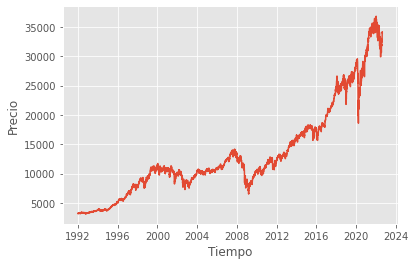

In [15]:
# Plot de Precios 
plt.figure()
plt.plot(data["Close"])
plt.xlabel("Tiempo")
plt.ylabel("Precio")
plt.show()

In [16]:
# Input para Test Jarque-Bera
x     = data["rendimientos_close"]
x_tam = len(x)

In [17]:
# Computo "Metricas de Riesgo" 
x_mean    = np.mean(x)
x_stdev   = np.std(x)
x_skew    = skew(x)
x_kurt    = kurtosis(x)
x_sharpe  = x_mean/x_stdev*np.sqrt(252)
x_var_95  = np.percentile(x,5) 
x_cvar_95 = np.mean(x[x <= x_var_95])
x_JB      = x_tam/6*(x_skew**2 + 1/4*x_kurt**2)
p_value   = 1 - chi2.cdf(x_JB,df = 2)
is_normal = (p_value > 0.05)

In [18]:
# Output "Metricas de Riesgo"
print('-----------------------------------------------')
print('media: \t\t\t'    + str(x_mean))
print('std: \t\t\t'      + str(x_stdev))
print('skewness: \t\t'   + str(x_skew))
print('kurtosis: \t\t'   + str(x_kurt))
print('Cof_Sharpe: \t\t' + str(x_sharpe))
print('VaR 95%: \t\t'    + str(x_var_95))
print('CVarR 95%: \t\t'  + str(x_cvar_95))
print('Jarque-Bera:\t\t' + str(x_JB))
print('p-value: \t\t'    + str(p_value))
print('Es_normal: \t\t'  + str(is_normal))
print('-----------------------------------------------')

-----------------------------------------------
media: 			0.0003697667290218688
std: 			0.011153711835638742
skewness: 		-0.17163878031190663
kurtosis: 		12.721856290360417
Cof_Sharpe: 		0.5262700825594618
VaR 95%: 		-0.0165327668609045
CVarR 95%: 		-0.026550936751216163
Jarque-Bera:		52057.75767084208
p-value: 		0.0
Es_normal: 		False
-----------------------------------------------


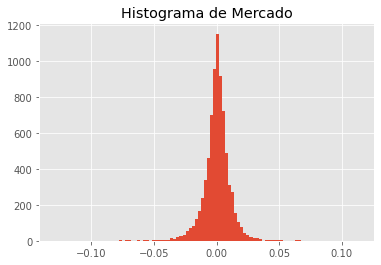

In [19]:
# Plot Histograma
plt.figure()
plt.hist(x,bins = 100)
plt.title("Histograma de Mercado")
plt.show()